# First Neurons

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

** Set Random Seeds for same results **

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

** Data Setup **

Setting Up some Random Data for Demonstration Purposes

In [3]:
rand_a = np.random.uniform(0,100,(4,4))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562],
       [ 68.52769817,  83.38968626,  30.69662197,  89.36130797],
       [ 72.15438618,  18.99389542,  55.42275911,  35.2131954 ],
       [ 18.18924027,  78.56017619,  96.54832224,  23.23536618]])

In [4]:
rand_b = np.random.uniform(0,100,(4,1))
rand_b

array([[  8.35614337],
       [ 60.35484223],
       [ 72.89927573],
       [ 27.62388285]])

In [5]:
# CONFIRM SAME  RANDOM NUMBERS (EXECUTE SEED IN SAME CELL!) Watch video for explanation
np.random.seed(101)
rand_a = np.random.uniform(0,100,(4,4))
rand_b = np.random.uniform(0,100,(4,1))

### Placeholders

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

### Operations

In [7]:
add_op = a+b # tf.add(a,b)
mult_op = a*b #tf.multiply(a,b)

### Running Sessions  to create Graphs with Feed Dictionaries

In [8]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[  59.99600601   65.42289734   11.2035656    25.50830841]
 [ 128.88253784  143.74453735   91.0514679   149.71615601]
 [ 145.05366516   91.89317322  128.32203674  108.11247253]
 [  45.8131218   106.18405151  124.17221069   50.85924911]]


[[  431.5100708    476.85797119    23.79347038   143.32595825]
 [ 4135.97802734  5032.97167969  1852.68981934  5393.38769531]
 [ 5260.00292969  1384.64123535  4040.27905273  2567.01660156]
 [  502.45739746  2170.13696289  2667.03955078   641.85101318]]


________________________

________________________

## Example Neural Network

In [9]:
n_features = 8
n_dense_neurons = 2

In [10]:
# Placeholder for x
x = tf.placeholder(tf.float32,(None,n_features))

In [11]:
# Variables for w and b
b = tf.Variable(tf.zeros([n_dense_neurons]))

W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

** Operation Activation Function **

In [12]:
xW = tf.matmul(x,W)

In [13]:
z = tf.add(xW,b)

In [14]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

** Variable Intializer! **

In [15]:
init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [17]:
print(layer_out)

[[ 0.06130349  0.85573357]]


We still need to finish off this process with optimization! Let's learn how to do this next.

_____

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [18]:
x_data = np.linspace(0,10,15) + np.random.uniform(-1.5,1.5,15)

In [19]:
x_data

array([  0.70445717,   0.84017103,   2.6680321 ,   3.0666176 ,
         2.56613635,   3.1431016 ,   5.64434443,   4.53089473,
         6.80958516,   7.41940457,   7.25734149,   9.12455097,
         7.36286801,   8.09425677,  10.60452189])

In [20]:
y_label = np.linspace(0,10,15) + np.random.uniform(-1.5,1.5,15)

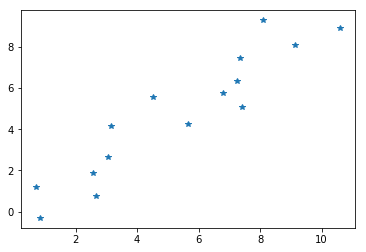

In [21]:
plt.plot(x_data,y_label,'*')

** Variables **

In [22]:
np.random.rand(2)

array([ 0.0528084 ,  0.17827692])

In [23]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

### Cost Function

In [24]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


### Optimizer

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [26]:
init = tf.global_variables_initializer()

### Create Session and Run!

In [27]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 150
    
    for i in range(epochs):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [28]:
final_slope

0.866018

In [29]:
final_intercept

0.2103917

### Evaluate Results

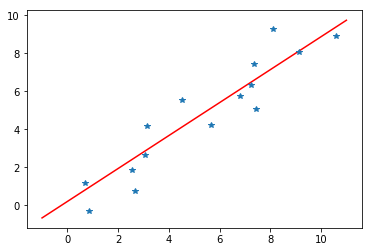

In [30]:
x_test = np.linspace(-1,11,15)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Great Job!